# PROJECT DESCRIPTION

The Sure Tomorrow insurance company wants to protect its clients' data. Your task is to develop a data transforming algorithm that would make it hard to recover personal information from the transformed data. Prove that the algorithm works correctly

The data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model.

-  This is called data masking, or data obfuscation. You are also expected to prove that the algorithm works correctly.
-  Additionally, the data should be protected in such a way that the quality of machine learning models doesn't suffer. 
-  You don't need to pick the best model. 

Follow these steps to develop a new algorithm: 
- construct a theoretical proof using properties of models and the given task; 
- formulate an algorithm for this proof; 
- check that the algorithm is working correctly when applied to real data. 
- We will use a simple method of data masking, based on an invertible matrix. 
- Project instructions Download and look into the data. 
- Provide a theoretical proof based on the equation of linear regression. 
- The features are multiplied by an invertible matrix. 
- Show that the quality of the model is the same for both sets of parameters: the original features and the features after multiplication. 
- How are the weight vectors from MSE minimums for these models related? 
- State an algorithm for data transformation to solve the task. 
- Explain why the linear regression quality won't change based on the proof above. 
- Program your algorithm using matrix operations. 
- Make sure that the quality of linear regression from sklearn is the same before and after transformation.
- Use the R2 metric. 
- Data description The dataset is stored in file /datasets/insurance_us.csv. 
- Download dataset. 
- Features: insured person's gender, age, salary, and number of family members. Target: number of insurance benefits received by the insured person over the last five years.

# TABLE OF CONTENTS

 <a href ="#IMPORT-LIBRARIES,-DEFINE-GLOBAL-FUNCTIONS,-VARIABLES">Import libraries etc.</a>

 <a href = "#1.0-Data-downloading">1.0 Data Downloading</a>

 <a href = "#2.0-MULTIPLICATION-OF-MATRICES">2.0 MULTIPLICATION-OF-MATRICES</a>

 <a href = "#3.0-TRANSFORMATION-ALGORITHM">3.0 TRANSFORMATION-ALGORITHM</a>

 <a href = "#4.0-ALGORITHM-TEST">4.0 ALGORITHM-TEST</a>

 <a href = "#5.0-OVERALL-CONCLUSION">5.0 OVERALL-CONCLUSION</a>

 <a href ="#6.0-Checklist">6.0 Checklist</a>


# IMPORT LIBRARIES, DEFINE GLOBAL FUNCTIONS, VARIABLES

In [1]:
#Import all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   #visualization
sns.set(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import sys
print (sys.version)

#define most used variables
RANDOM_STATE=12345
PRINTING_SEPARATOR = '*' * 100
TARGET = 'Insurance benefits'

3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:57:50) 
[GCC 7.5.0]


In [2]:
#I DEFINED A MACRO FOR "PRINT" and "DISPLAY" FUNCTION using DEBUG FLAG
#If DEBUG=0, the PRINT(), DISPLAY() function will print nothing
#If DEBUG=1, the PRINT(), DISPLAY() function will work like the standard functions

def printNothing(*args):
  pass

DEBUG=0
if (DEBUG):
  print('DEBUG ON')
  PRINT = print
  DISPLAY = display
else:
  print('DEBUG OFF')
  PRINT = printNothing
  DISPLAY = printNothing

DEBUG OFF


In [3]:
#Use it to print separator between the printing information
def PRINT_SEPARATOR():
  print(PRINTING_SEPARATOR)
  print()

# RESULTS DATAFRAME

In [4]:
#Create a dataframe to dataframe name, Model name and model results
column_names = ["Model","Training Data","R2 Score","MSE - Mean Squared Error"]
# Intitialize lists data. 
df_results = pd.DataFrame(columns = column_names)
display(df_results)

,Model,Training Data,R2 Score,MSE - Mean Squared Error


# 1.0 Data downloading

In [5]:
#Import the file and create the dataset
path = '/datasets'

#Create dataframe to store the source data
df = pd.read_csv(path+'/insurance_us.csv')   #training dataset download

In [6]:
def display_information(df):
    print('Head:')
    print()
    display(df.head())
    PRINT_SEPARATOR()
    print('Info:')
    print()
    display(df.info())
    PRINT_SEPARATOR()
    print('Describe:')
    print()
    display(df.describe())
    PRINT_SEPARATOR()
    print('Skew Factor')
    print(df.skew())
    PRINT_SEPARATOR()
    print('Columns with nulls:')
    display(get_percent_of_na_df(df,4))
    PRINT_SEPARATOR()
    print('Shape:')
    print(df.shape)
    PRINT_SEPARATOR()
    print('Duplicated:')
    print('Duplicate rows:', df.duplicated().sum(), ', Duplicate percentage:', (df.duplicated().sum() * 100 ) /df.shape[0],'%')
    
def get_percent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

In [7]:
display_information(df)
PRINT_SEPARATOR()

Head:



,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Gender                5000 non-null int64
Age                   5000 non-null float64
Salary                5000 non-null float64
Family members        5000 non-null int64
Insurance benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

****************************************************************************************************

Describe:



,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


****************************************************************************************************

Skew Factor
Gender                0.004001
Age                   0.515148
Salary               -0.036723
Family members        0.898297
Insurance benefits    3.845707
dtype: float64
****************************************************************************************************

Columns with nulls:


,Missing Values,Percent of Nulls
Gender,0,0.0
Age,0,0.0
Salary,0,0.0
Family members,0,0.0
Insurance benefits,0,0.0


****************************************************************************************************

Shape:
(5000, 5)
****************************************************************************************************

Duplicated:
Duplicate rows: 153 , Duplicate percentage: 3.06 %
****************************************************************************************************



## 1.1 CONCLUSION
- We see 153 duplicated rows, which is 3.06% of the total dataset.
- Remove the duplicated rows and check



## 1.2 DATA PREPROCESSING: Remove Duplicated Rows

In [8]:
df = df.drop_duplicates()
print(df.shape)

print('Duplicated:')
print("\033[1m" + 'We have {} duplicated rows.'.format(df.duplicated().sum()) + "\033[0m")

(4847, 5)
Duplicated:
We have 0 duplicated rows.


## 1.2 Data Preprocessing CONCLUSION
- No more duplicated rows, removed 153 duplicated rows, which is 3.06% of the total dataset.


# EXPLORATORY DATA ANALYSIS
- Heatmap
- Bar Chart

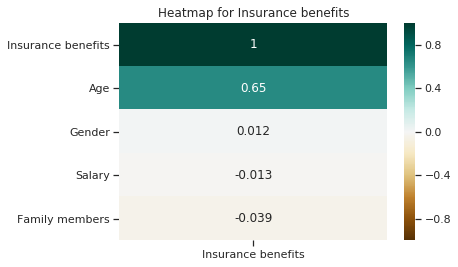

In [9]:
ax = sns.heatmap(df.corr()[[TARGET]].sort_values(by=TARGET, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set(title="Heatmap for " + TARGET);

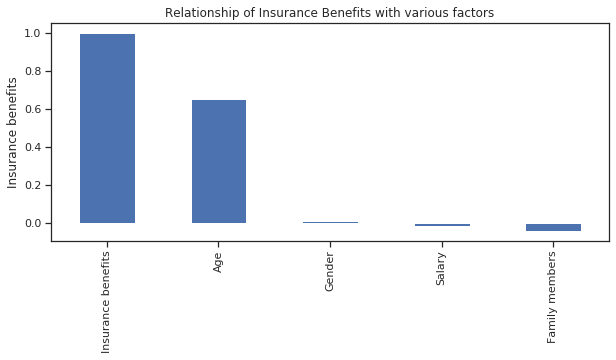

In [10]:
  plt.figure(figsize=(10,4))
  ax = df.corr()[TARGET].sort_values(ascending = False).plot(kind='bar')
  ax.set(title="Relationship of Insurance Benefits with various factors",ylabel=TARGET);

## EDA CONCLUSION
- Insurance Benefits has strong positive correlation with Age.
- Insurance Benefits has very weak positive correlation with Gender.
- Insurace Benefits has very weak negative correlation with Family Members and Salary.

# 2.0 MULTIPLICATION OF MATRICES

In this task, you can write formulas in *Jupyter Notebook.*

To write the formula in-between the text, frame it with dollar signs \\$; if it should be outside the text —  with double signs \\$\\$. These formulas are written in markup language *LaTeX.* 

For example, we wrote down linear regression formulas. You can copy and edit them to solve the task.

You don't have to use *LaTeX*.

Provide a theoretical proof based on the equation of linear regression. The features are multiplied by an invertible matrix. Show that the quality of the model is the same for both sets of parameters: the original features and the features after multiplication. How are the weight vectors from MSE minimums for these models related?

Denote:

- $X$ — feature matrix (zero column consists of unities)

- $y$ — target vector

- $P$ — matrix by which the features are multiplied

- $w$ — linear regression weight vector (zero element is equal to the shift)

Predictions:

$$
a = Xw
$$

Training objective:

$$
\min_w d_2(Xw, y)
$$

Training formula:

$$
w = (X^T X)^{-1} X^T y
$$

## 2.1 PROOF OF TRANSFORMATION ALGORITHM:
- To prove:
   - The Regression Model will give the same prediction results (**a**) on the:
      - Feature Set $X$ or 
      - Multiplication of $X$ with $P$

- Given: 

   Denote:

- $X$ — feature matrix (zero column consists of unities)

- $y$ — target vector

- $P$ — matrix by which the features are multiplied

- $w$ — linear regression weight vector (zero element is equal to the shift)
   Predictions:

$$
a = Xw
$$

Training objective:

$$
\min_w d_2(Xw, y)
$$

Training formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Properties of the Transpose of a Matrix**

- r is a real number
- A,B are matrices
- if A is a symmetric matrix, can switch the terms with each other
$$
A^{T}A  = AA^{T}
$$

- $P$ is invertible, $P$'s invertible is $P^{-1}$

- Other Matrix properties I will use:
$$
(A^{T})T  =  A
$$
$$
(A + B)^{T}  =  A^{T}+ B^{T}
$$
$$
(AB)^{T}  =  B^{T}A^{T}
$$
$$
(rA)^{T}  =  rA^{T}
$$

## 2.2 EQUATIONS AND CALCULATIONS

=======================  Answer  =================

**Equation 1:** Let $X_1$ be the new matrix resulting from multiplication of $X$ and $P$

$$ X_1 = XP $$  

**Equation 2:** Let $w_1$ be the new regression weight vector.

$$ w_1 = (X_1^T X_1)^{-1} X_1^T y $$

**Equation 3:** Let $a_1$ be the new prediction.  
$$ a_1 = X_1w_1 $$

Let's Replace $X_1$ with $X_1$ = $XP$ in Equation-2

$$
w_1 = ((XP)^T (XP))^{-1} (XP)^T y
$$

$$
w_1 = (P^TX^TXP)^{-1}P^TX^Ty
$$

$$
w_1 = P^{-1}(P^TX^TX)^{-1}P^TX^Ty
$$

$$
w_1 = P^{-1}(P^TX^TX)^{-1}P^TX^Ty
$$

$$
w_1 = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$
$$
w_1 = P^{-1}(X^TX)^{-1}X^Ty
$$

$$
w_1 = P^{-1}w 
$$

Substitute $X_1$ and $w_1$ in Equation-3 for $a_1$
$$ a_1 = X_1w_1 $$
$$ a_1 = XPP^{-1}w $$
$$ a_1 = Xw $$

This implies
$$ a_1 = a $$

# 2.3  CONCLUSION
Hence

# $$a = a_1 = Xw$$
AND
# $$ w_1 = P^{-1}w $$

- This proves that our predictions ($a=Xw$) will be the same even if we use transform matrix, since both predictions (before transform and after transform) are equal.($a = a1$)

- Quality of the model remains the same for for both sets of parameters: the original features and the features after multiplication. 
- The weight vectors from MSE minimums for these models are related with the formula: $$ w_1 = P^{-1}w $$

## 2.4 DATA SAMPLE EXAMPLE FOR HOW DATA MASKING WILL WORK

- Matrix and the matrix invertible of the same matrix will be used to mask the matrix data.

In [11]:
#Let's take a rectangular Array 'A'
A = np.array([[1,2,5,9],
     [3,0,4,1],
     [5,60,2,2]])

At = A.T            #A transpose
Ai = A.dot(At)      #Matrix times its Transpose  <-- This is the invertible matrix
AiA = Ai.dot(A)     # Invertible Matrix  times Matrix 
AiI = np.linalg.inv(Ai) # Inverse of Invertible Matrix
AiIAiA = (AiI.dot(AiA)).round().astype(int)

PRINT_SEPARATOR()
print('Matrix A:\n',A)
PRINT_SEPARATOR()
print('Matrix Transpose of A: At:\n',At)
PRINT_SEPARATOR()
print('Matrix Invertible of A: Ai:\n',Ai)
PRINT_SEPARATOR()
print('Matrix Multiplication (Invertible times Matrix): AiA:\n',AiA)
PRINT_SEPARATOR()
print('Matrix Inverse of Invertible, AiI:\n',AiI)
PRINT_SEPARATOR()
print('Multiplication of Inverse times Invertible: AiIAiA:\n',AiIAiA)

****************************************************************************************************

Matrix A:
 [[ 1  2  5  9]
 [ 3  0  4  1]
 [ 5 60  2  2]]
****************************************************************************************************

Matrix Transpose of A: At:
 [[ 1  3  5]
 [ 2  0 60]
 [ 5  4  2]
 [ 9  1  2]]
****************************************************************************************************

Matrix Invertible of A: Ai:
 [[ 111   32  153]
 [  32   26   25]
 [ 153   25 3633]]
****************************************************************************************************

Matrix Multiplication (Invertible times Matrix): AiA:
 [[   972   9402    989   1337]
 [   235   1564    314    364]
 [ 18393 218286   8131   8668]]
****************************************************************************************************

Matrix Inverse of Invertible, AiI:
 [[ 0.01482017 -0.01775758 -0.00050194]
 [-0.01775758  0.05999491  0.000335  ]
 [-0.0005

## 2.5 CONCLUSION:
- We see in the above example that:
  -  We multiplied the invertible matrix (Matrix times its Transpose) with the matrix
  - Then we multiplied the above result the inverse of Invertible Matrix.
  - We got back the original matrix
- Datamasking helped us mask the original data, however, we didn't loose any data for model training or prediction. 
- Hence, we should be able to train and use the Linear Regression model on Masked data.

# 3.0 TRANSFORMATION ALGORITHM

** Transformation Algorithm**

TRANSFORMED FEATURES BY MULTIPLYING FEATURES WITH THEIR OWN INVERTIBLE
1. Create an invertible matrix of the Features matrix.
2. Multiply feature matrix by Invertible Matrix
3. Check to see the difference before and after the transformation

TRANSFORMED FEATURES BY MULTIPLYING FEATURES WITH RANDOM MATRIX
1. Create a Random Matrix.
    - transform_matrix = np.random.normal(size=(features.cols, features.cols))
2. Check that the Random Matrix is invertible
    - np.linalg.inv(transform_matrix)
3. Multiply feature matrix by Random Invertible Matrix
4. Check to see the difference before and after the transformation

## 3.1 MODELS AND DATA TO BE TESTED
I will test following models, data:

-  A.1: sklearn Linear Regression on Regular Scaled data

-  A.2: sklearn Linear Regression on Features masked with invertible of feature matrix

-  A.3: sklearn Linear Regression on Features transformed with multiplication of feature matrix with a random matrix

-  A.4: My Linear Regression on Regular Scaled data

-  A.5: My LinearRegression on Features masked with invertible of feature matrix

-  A.6: My LinearRegression on Features transformed with multiplication of feature matrix with a random matrix


Results will be published at each step.

# 4.0 ALGORITHM TEST

## 4.1  FEATURE ENGINEERING
- Create Training and Test sets
- Scale the features

In [12]:
features =  df.drop(TARGET , axis=1)
target = df[TARGET]

#Standardize the numerical features, all features are numeric
scaler = StandardScaler()

# < Scaler transform feature set >
features = pd.DataFrame(scaler.fit_transform(features),columns = features.columns)

#SPLIT TRAINING INTO TRAINING (75%) AND VALIDATION_TEST (25%)
features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=RANDOM_STATE)

totsize = len(df)
PRINT_SEPARATOR()
print('training set  : {0:.0%}'.format(len(features_train) /totsize),features_train.shape, ', training target   :',target_train.shape)
print('test set: {0:.0%}'.format(len(features_test)/totsize),features_test.shape,', test target :',target_test.shape)

****************************************************************************************************

training set  : 75% (3635, 4) , training target   : (3635,)
test set: 25% (1212, 4) , test target : (1212,)


In [13]:
print('features:\n',features.values)
PRINT_SEPARATOR()
print('features_test:\n',features_test.values)

features:
 [[ 1.0030995   1.1754362   0.97315092 -0.18517565]
 [-0.99691008  1.76456423 -0.19011493 -0.18517565]
 [-0.99691008 -0.23847105 -1.89490109 -1.09546611]
 ...
 [-0.99691008 -1.29890149 -0.60126924  0.7251148 ]
 [ 1.0030995  -1.06325028 -0.72160708  1.63540526]
 [ 1.0030995  -0.35629665  0.07061707 -0.18517565]]
****************************************************************************************************

features_test:
 [[ 1.0030995  -0.94542468  0.73247523 -1.09546611]
 [ 1.0030995   0.11500576  2.60774001 -1.09546611]
 [ 1.0030995   0.23283137 -0.60126924  0.7251148 ]
 ...
 [ 1.0030995  -0.59194786 -0.64138185  1.63540526]
 [-0.99691008 -0.70977347 -0.68149447 -1.09546611]
 [ 1.0030995   2.35369225 -0.71157893 -0.18517565]]


## 4.2 FEATURES WTIH DATA MASKING USING INVERTIBLE MATRIX OF FEATURES
- We mask the features by multiplying the features vector with its invertible.
- We will also convert target to target vector.

In [14]:
featuresV = np.array(features.values)
print(featuresV)
print()
print(featuresV.T)
#features_tmp  = np.linalg.inv(featuresV.dot(featuresV.T))
features_tmp  = featuresV.dot(featuresV.T)  #Matrix multiplied with Transpose is invertible matrix
print(features_tmp.shape, features.shape)
features_invert = features_tmp.dot(featuresV)
test = np.linalg.inv(features_tmp)
print('inverse:',features_tmp.shape,'\nmult with inverse:',features_invert.shape, '\noriginal:',features.shape)

target_invert = np.array(target.values)
#SPLIT TRAINING INTO TRAINING (75%) AND VALIDATION_TEST (25%)
features_invert_train, features_invert_test, target_invert_train, target_invert_test = train_test_split(
        features_invert, target_invert, test_size=0.25, random_state=RANDOM_STATE)

totsize = len(df)
PRINT_SEPARATOR()
print('training set  : {0:.0%}'.format(len(features_invert_train) /totsize),features_invert_train.shape, ', training target   :',target_invert_train.shape)
print('test set: {0:.0%}'.format(len(features_invert_test)/totsize),features_invert_test.shape,', test target :',target_invert_test.shape)

[[ 1.0030995   1.1754362   0.97315092 -0.18517565]
 [-0.99691008  1.76456423 -0.19011493 -0.18517565]
 [-0.99691008 -0.23847105 -1.89490109 -1.09546611]
 ...
 [-0.99691008 -1.29890149 -0.60126924  0.7251148 ]
 [ 1.0030995  -1.06325028 -0.72160708  1.63540526]
 [ 1.0030995  -0.35629665  0.07061707 -0.18517565]]

[[ 1.0030995  -0.99691008 -0.99691008 ... -0.99691008  1.0030995
   1.0030995 ]
 [ 1.1754362   1.76456423 -0.23847105 ... -1.29890149 -1.06325028
  -0.35629665]
 [ 0.97315092 -0.19011493 -1.89490109 ... -0.60126924 -0.72160708
   0.07061707]
 [-0.18517565 -0.18517565 -1.09546611 ...  0.7251148   1.63540526
  -0.18517565]]
(4847, 4847) (4847, 4)
inverse: (4847, 4847) 
mult with inverse: (4847, 4) 
original: (4847, 4)
****************************************************************************************************

training set  : 75% (3635, 4) , training target   : (3635,)
test set: 25% (1212, 4) , test target : (1212,)


In [15]:
print('Masked features - features multiplied with invertible:\n',features_invert)
PRINT_SEPARATOR()
print('Masked test features - features multiplied with invertible:\n',features_invert_test)

Masked features - features multiplied with invertible:
 [[ 4952.62113975  5632.96237308  4721.39253332 -1134.21103263]
 [-4822.99254557  8567.560158   -1116.43375161  -910.52251036]
 [-4937.39698754  -957.49502354 -9070.92496555 -4972.87451398]
 ...
 [-4915.07412094 -6286.39972819 -2990.94011154  3699.3852781 ]
 [ 4739.91439435 -5155.1107823  -3584.05386284  8048.78286301]
 [ 4870.50531498 -1715.28815526   475.89367274  -928.30405964]]
****************************************************************************************************

Masked test features - features multiplied with invertible:
 [[ 4946.7840309  -4586.57752559  3873.37419377 -5416.25198695]
 [ 5097.30893029   395.29587308 12873.41761385 -5750.85065673]
 [ 4793.47534596  1156.84631105 -2970.19331017  3561.18404036]
 ...
 [ 4750.38689484 -2877.4687298  -3234.9199244   8015.75642607]
 [-4850.95783861 -3344.15445656 -3149.82532081 -5138.53035563]
 [ 4837.56680888 11485.94554727 -3543.78745498  -927.22465694]]


## 4.2 CONCLUSION
- Now we have all the feature data masked with its invertible.

## 4.3 FEATURES WTIH DATA MASKING USING A RANDOM TRANSFORM MATRIX
- We mask the features by multiplying the features vector with a new matrix created of random numbers.
- We will also convert target to target vector.

In [16]:
# Create random matrix
transform_matrix = np.random.normal(size=(features_train.shape[1], features_train.shape[1]))
transform_matrix

array([[ 0.76651451, -1.53597269,  0.8930597 ,  0.20726324],
       [-1.01092629,  2.14470123,  0.75216841,  0.82588116],
       [-0.33543712, -0.03126964,  0.14658537, -0.46837951],
       [ 0.93113688,  0.48841473,  0.0644168 ,  1.33752589]])

In [17]:
# Check if matrix is invertible
np.linalg.inv(transform_matrix)

array([[-0.45143965, -0.84257821,  5.90566948,  2.6582894 ],
       [-0.55650549, -0.24152025,  3.92268441,  1.60902692],
       [ 0.4348439 ,  0.15290345,  2.99788633,  0.88801369],
       [ 0.49654839,  0.66740252, -5.6881125 , -1.7332799 ]])

In [18]:
features_train_transformed = features_train@transform_matrix
features_test_transformed = features_test@transform_matrix
print('Transformed features - features multiplied with a random matrix:\n',features_train_transformed)
PRINT_SEPARATOR()
print('Masked test features - features multiplied with a random:\n',features_test_transformed)

Transformed features - features multiplied with a random matrix:
              0         1         2         3
4460 -0.220033  1.075438 -0.896907 -0.216978
3773 -0.597907  0.097802  1.660971  0.131598
4561  0.300225 -0.296866 -1.699589 -0.579054
1385 -3.650271  5.036785  0.438899 -0.065737
724  -1.756955  3.732234 -0.215444  0.766541
...        ...       ...       ...       ...
3497  1.945647 -3.622154  0.000855 -0.271230
3492 -0.606191  1.201464 -1.084052 -0.262923
2177  2.279439 -4.382451 -0.254730 -0.596039
3557  0.397952 -1.128386  1.042919  0.203990
4578 -1.526307  4.383125  0.149375  1.386234

[3635 rows x 4 columns]
****************************************************************************************************

Masked test features - features multiplied with a random:
              0         1         2         3
1321  0.458917 -4.126333  0.221513 -2.381193
3767 -1.242134 -1.910665  1.294022 -2.383740
166   1.410384 -0.668422  1.029528  1.651679
2935 -0.346213  3.965525 -0.

## 4.3 CONCLUSION
- Now we have all the feature data matrix masked with a random data matrix.

## 4.4 MODEL - sklearn Linear Regression 



In [19]:
def standardLinearRegression(features,target,features_test):
    model = LinearRegression()
    model.fit(features,target)
    return(model.predict(features_test))

def printMetrics(target,predictions,modelName,dataType, df_results):
    mse = mean_squared_error(target,predictions)
    PRINT('MSE',mse)
    r2 = r2_score(target,predictions)
    PRINT('R2 SCORE',r2)
    # Plot outputs
    PRINT_SEPARATOR()
    plt.figure(figsize=(12,6))
    plt.scatter(target,predictions,color='black')
    plt.plot(target,predictions, color='blue', linewidth=0.5)
    plt.xlabel("Target Insurance benefits")
    plt.ylabel("Predicted Insurance Benefits")
    plt.show()

    resultRowStr= [modelName,dataType,r2,mse]
    rows = pd.Series(resultRowStr, index=df_results.columns)
    # append the rows
    df_results=df_results.append(rows,ignore_index=True).round(decimals=3)
    #df_results=df_results.append(rows,ignore_index=True)
    PRINT_SEPARATOR()
    display(df_results)
    return(df_results)

### A.1 sklearn Linear Regression on Features without data masking

****************************************************************************************************



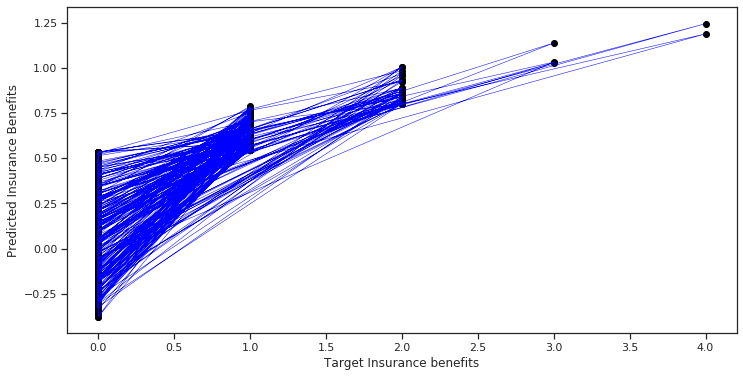

****************************************************************************************************



,Model,Training Data,R2 Score,MSE - Mean Squared Error
0,sklearn Linear Regression,Regular Data,0.424,0.119


In [20]:
predictions_test = standardLinearRegression(features,target,features_test)
df_results = printMetrics(target_test, predictions_test,'sklearn Linear Regression','Regular Data',df_results)

### A.2  sklearn Linear Regression on Features Transformed with invertible of Features matrix



****************************************************************************************************



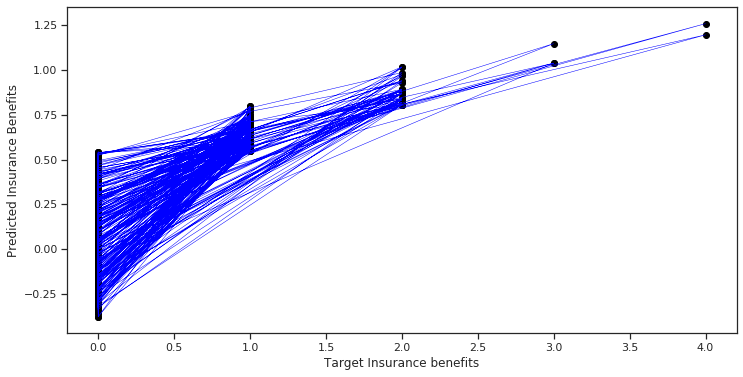

****************************************************************************************************



,Model,Training Data,R2 Score,MSE - Mean Squared Error
0,sklearn Linear Regression,Regular Data,0.424,0.119
1,sklearn Linear Regression,Transformed with own invertible,0.423,0.120


In [21]:
predictions_invert_test = standardLinearRegression(features_invert_train,target_invert_train,features_invert_test)
df_results = printMetrics(target_invert_test, predictions_invert_test,'sklearn Linear Regression','Transformed with own invertible',df_results)

### A.3 sklearn Linear Regression on Transformed data using a random matrix


****************************************************************************************************



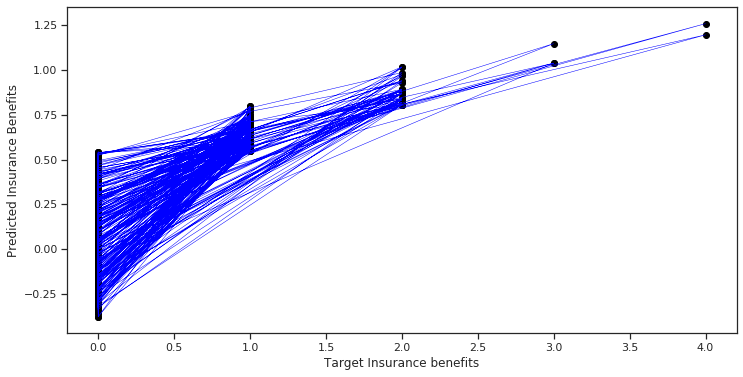

****************************************************************************************************



,Model,Training Data,R2 Score,MSE - Mean Squared Error
0,sklearn Linear Regression,Regular Data,0.424,0.119
1,sklearn Linear Regression,Transformed with own invertible,0.423,0.120
2,sklearn Linear Regression,Transformed with Random Matrix,0.423,0.120


In [22]:
predictions_transformed_test = standardLinearRegression(features_train_transformed,target_train,features_test_transformed)
df_results = printMetrics(target_test, predictions_transformed_test,'sklearn Linear Regression','Transformed with Random Matrix',df_results)

### Conclusion: 
- All results in skLearn Linear Regression show that the original data and transformed data have same R2 and MSE.
- We will now proceed to evaluate our own Linear Regression Algorithm written as per taught in the Practicum Course.
- We will compare the results of sklearn and our Linear Regression algorithm.

## 4.5. MODEL - My Linear Regression algorithm with prediction formulas in vector format.


In [23]:
class MyLinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print('w is',self.w)
        print('w0 is',self.w0)
        

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

def myLinearRegressionModel(features,target,test_features):
    my_model = MyLinearRegression()
    my_model.fit(features, target)
    return(my_model.predict(test_features))

def printMyModelMetrics(target,predictions):
  r2 = r2_score(target, predictions)
  mse = mean_squared_error(target,predictions)
 
  print('Coefficient of determination: %.2f' % r2)
  # The mean squared error
  print('Mean squared error: %.2f' % mse)

  # plot data and predictions
  plt.figure(figsize=(12,6)) 
  plt.scatter(target,predictions)
  plt.plot(target, predictions, color='red')
  return r2,mse

### A.4  My Linear Regression Model on Features without data obfuscation


w is [ 0.00473007  0.30692826 -0.00138601 -0.01565625]
w0 is 0.1522591293583661
****************************************************************************************************



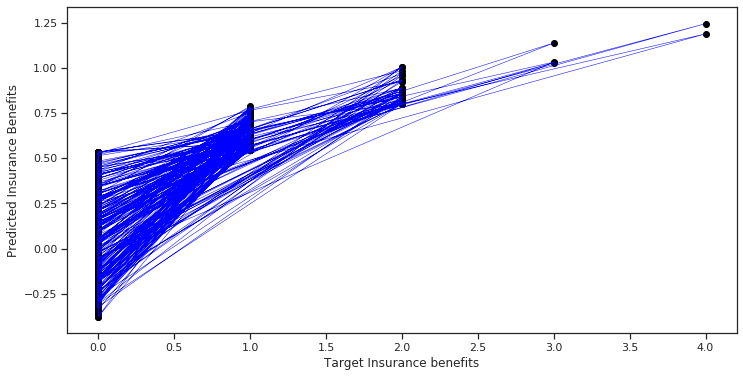

****************************************************************************************************



,Model,Training Data,R2 Score,MSE - Mean Squared Error
0,sklearn Linear Regression,Regular Data,0.424,0.119
1,sklearn Linear Regression,Transformed with own invertible,0.423,0.120
2,sklearn Linear Regression,Transformed with Random Matrix,0.423,0.120
3,My Linear Regression,Regular Data,0.424,0.119


In [24]:
predictions_test = myLinearRegressionModel(features,target,features_test)
df_results = printMetrics(target_test, predictions_test,'My Linear Regression','Regular Data',df_results)

### A.5  My Linear Regression Model - Features masked with invertible matrix of Features

w is [ 8.21871783e-07  6.33104249e-05  7.18835403e-07 -2.62747770e-06]
w0 is 0.15225912935836608
****************************************************************************************************



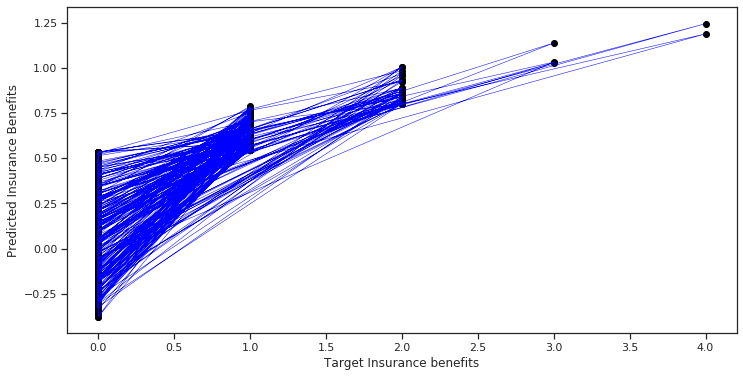

****************************************************************************************************



,Model,Training Data,R2 Score,MSE - Mean Squared Error
0,sklearn Linear Regression,Regular Data,0.424,0.119
1,sklearn Linear Regression,Transformed with own invertible,0.423,0.120
2,sklearn Linear Regression,Transformed with Random Matrix,0.423,0.120
3,My Linear Regression,Regular Data,0.424,0.119
4,My Linear Regression,Transformed with own invertible,0.424,0.119


In [25]:
predictions_invert_test = myLinearRegressionModel(features_invert, target_invert,features_invert_test)
df_results = printMetrics(target_invert_test, predictions_invert_test,'My Linear Regression','Transformed with own invertible',df_results)

### A.6  My Linear Regression Model - Features transformed with a random matrix

w is [-0.28959916 -0.09361143  0.04384028  0.22354971]
w0 is 0.1545729915471687
****************************************************************************************************



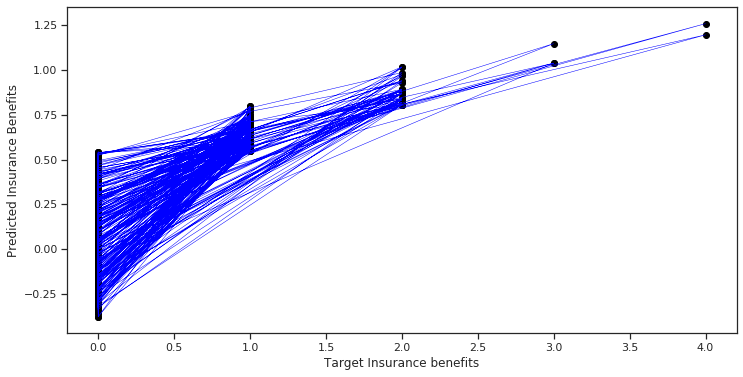

****************************************************************************************************



,Model,Training Data,R2 Score,MSE - Mean Squared Error
0,sklearn Linear Regression,Regular Data,0.424,0.119
1,sklearn Linear Regression,Transformed with own invertible,0.423,0.120
2,sklearn Linear Regression,Transformed with Random Matrix,0.423,0.120
3,My Linear Regression,Regular Data,0.424,0.119
4,My Linear Regression,Transformed with own invertible,0.424,0.119
5,My Linear Regression,Transformed with Random Matrix,0.423,0.120


In [26]:
predictions_transformed_test = myLinearRegressionModel(features_train_transformed,target_train,features_test_transformed)
df_results = printMetrics(target_test, predictions_transformed_test,'My Linear Regression','Transformed with Random Matrix',df_results)

# 5.0 OVERALL CONCLUSION

- The skLearn LinearRegression Model Scoring Results of Regular Data, Masked Data and Transformed are the same.
- My LinearRegression Model Scoring results of Regular Data, Masked Data and Transformed Masked Data are the same.
- The Results of skLearn LinearRegression Model and My Linear Regression model are also the same.
- We implemented the Linear Regression model correctly.
- Proof of how the Masked Data would work was provided with a proof and a sample data example.

# 6.0 Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [X]  Code is error free
- [X]  The cells with the code have been arranged in order of execution
- [X]  Step 1 performed: the data was downloaded
- [X]  Step 2 performed: the answer to the matrix multiplication problem was provided
    - [X]  The correct answer was chosen
    - [X]  The choice was justified
- [X]  Step 3 performed: the transform algorithm was proposed
    - [X]  The algorithm was described
    - [X]  The algorithm was justified
- [X]  Step 4 performed: the algorithm was tested
    - [X]  The algorithm was realized
    - [X]  Model quality was assessed before and after the transformation